In [ ]:
from qiskit import __version__
print(__version__)

In [1]:
from qiskit.quantum_info import Statevector
import numpy as np

In [2]:
u = Statevector([1/ np.sqrt(2), 1 /np.sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, 2 / 3])
w = Statevector([1/ 3, 2 / 3])

In [3]:
display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


In [4]:
from qiskit.visualization import array_to_latex

ket0 = np.array([[0],[1]])
ket1 = np.array([[1],[0]])

M1 = np.array([[1,1],[0,0]])
M2 = np.array([[1,0],[0,1]])

M = M1 / 2 + M2 / 2

print("M1 * ket1:")
display(array_to_latex(np.matmul(M1, ket1)))
print("\nM1 * M2:")
display(array_to_latex(np.matmul(M1, M2)))
print("\nM * M:")
display(array_to_latex(np.matmul(M, M)))

M1 * ket1:


<IPython.core.display.Latex object>


M1 * M2:


<IPython.core.display.Latex object>


M * M:


<IPython.core.display.Latex object>

In [5]:
print(u.is_valid())

True


In [6]:
display(v.draw('latex'))

<IPython.core.display.Latex object>

In [7]:
outcome, state = v.measure()
print(f"Outcome of measurement: {outcome}")
display(state.draw('latex'))

Outcome of measurement: 0


<IPython.core.display.Latex object>

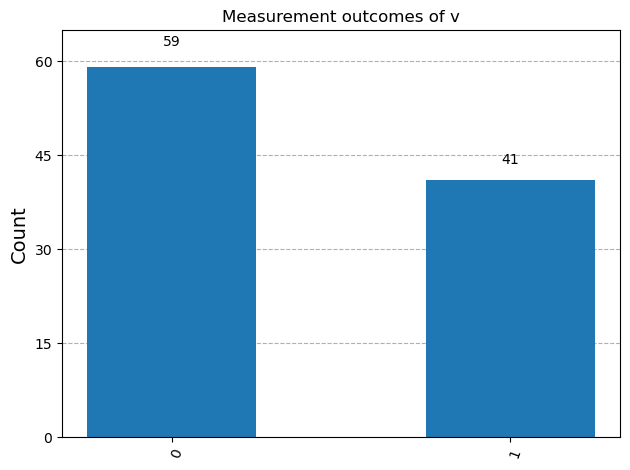

In [8]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(100)
plot_histogram(statistics, title="Measurement outcomes of v")

In [9]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
# print(Y.is_unitary())
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])
# print(H.is_unitary())
S = Operator([[1 , 0], [0, 1.0j]])
T = Operator([[1, 0],[0, (1 + 1.0j / np.sqrt(2))]])

display(T.draw('latex'))

<IPython.core.display.Latex object>

In [10]:
v = Statevector([1, 0])
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw('latex'))

<IPython.core.display.Latex object>

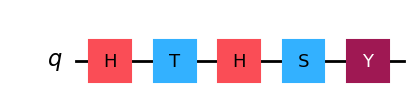

In [11]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw(output="mpl"))

In [12]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

In [13]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

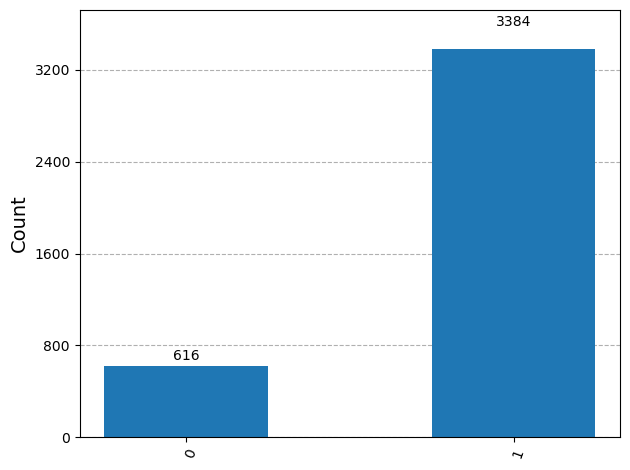

In [14]:
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))